### Setting up
- Importing Pandas as 'pd'
- Importing Numpy as 'np'
- Importing csv file

In [13]:
import numpy as np 
import pandas as pd 
df = pd.read_csv('drugs-data.csv')

In [18]:
df.head(10)

Drug-1  Drug-2  Drug-3
0    10.1     8.4    20.1
1    11.7     6.9    10.9
2    13.3    20.1    20.1
3    11.7     8.4    14.6
4    10.3    14.5    11.8
5    13.1     7.8    14.2
6    13.4     6.3    20.1
7    10.9    12.9    18.9
8     7.9     7.9    14.1
9     4.6     6.3    11.8

### Notes
Deleting the first two empty rows in drugs-data.csv using Bash 
`sed -i '' 1,2d drugs-data.csv`
- BSD sed on MacOS needs an empty string to act as a "separate shell" to work

### Individual Descriptive Statistics (Numpy)

In [25]:
np.mean(df)

Drug-1     9.929167
Drug-2     8.602083
Drug-3    15.312500
dtype: float64

In [28]:
np.std(df)

Drug-1    2.750300
Drug-2    3.232871
Drug-3    3.150504
dtype: float64

In [32]:
np.min(df)

Drug-1     4.6
Drug-2     5.3
Drug-3    10.3
dtype: float64

### Individual Descriptive Statistics (Pandas)

In [27]:
df.mean(axis=0)

Drug-1     9.929167
Drug-2     8.602083
Drug-3    15.312500
dtype: float64

In [29]:
df.std(axis=0)

Drug-1    2.779404
Drug-2    3.267082
Drug-3    3.183844
dtype: float64

In [30]:
df.count(axis=0)

Drug-1    48
Drug-2    48
Drug-3    48
dtype: int64

### Comprehensive Descriptive Statistics (Pandas)

In [33]:
df[["Drug-1","Drug-2","Drug-3"]].describe(include='all')

Drug-1     Drug-2     Drug-3
count  48.000000  48.000000  48.000000
mean    9.929167   8.602083  15.312500
std     2.779404   3.267082   3.183844
min     4.600000   5.300000  10.300000
25%     7.800000   6.475000  12.350000
50%     9.900000   7.650000  14.650000
75%    11.700000   8.800000  17.950000
max    17.900000  20.100000  21.200000

### Visualization of Drug Data

<AxesSubplot:>

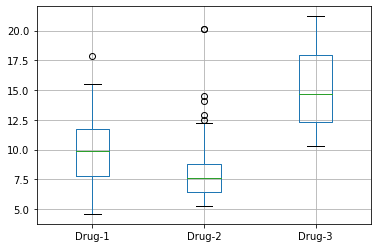

In [22]:
df.boxplot(column=['Drug-1','Drug-2','Drug-3'])

### ANOVA 

In [23]:
# reshape the 'df' data frame for the statsmodel package
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Drug-1', 'Drug-2', 'Drug-3'])
df_melt.columns = ['index', 'treatments', 'value']

In [14]:
import scipy.stats as stats
# The output of stats.f_oneway is the ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Drug-1'], df['Drug-2'], df['Drug-3'])
print(fvalue, pvalue)

63.7272627010607 1.925577585081492e-20


In [15]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F        PR(>F)
C(treatments)  1212.337917    2.0  63.727263  1.925578e-20
Residual       1341.181458  141.0        NaN           NaN

# Summary

The three drugs used have a moderate amount of variability with large positive error bars. This may imply inconsistency with effectiveness depending on the variables studied. 